# Single neuron: linear classification



In [1]:
!pip install -q tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 39kB/s 
     |████████████████████████████████| 3.8MB 24.6MB/s 
     |████████████████████████████████| 450kB 31.4MB/s 
     |████████████████████████████████| 81kB 6.3MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.1 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorboard 2.0.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.0 which is incompatible.


In [2]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(tf.__version__, tf.test.gpu_device_name())
device_lib.list_local_devices()

2.0.0 /device:GPU:0


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 8403069472247003871, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 6727699188438160700
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 18161178296299788628
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11330115994
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12926346272851284122
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Load the data

In [0]:
data = load_breast_cancer()

## Play with the data

In [5]:
type(data)

sklearn.utils.Bunch

In [6]:
dir(data)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [7]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [8]:
print(data.data.shape)
print(data.data)

(569, 30)
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [9]:
print(data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [10]:
print(data.target.shape)
print(data.target_names)
print(data.target)

(569,)
['malignant' 'benign']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1

In [0]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['class'] = data.target

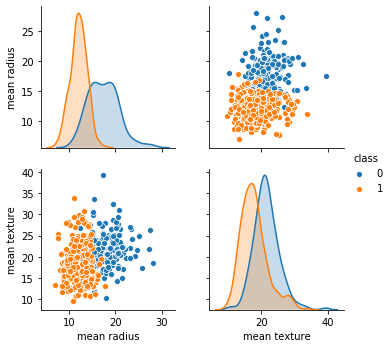

In [12]:
g = sns.pairplot(df, vars=['mean radius', 'mean texture'], hue="class")

## Prepare the data

Split the data: train and test

In [0]:
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3)

Scale the data

In [0]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Build the model

In [0]:
model = tf.keras.models.Sequential()

In [0]:
model.add( tf.keras.layers.Dense(units=1,activation='sigmoid', input_shape=(30,)) )

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Train the model

In [37]:
result = model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), epochs=1000)

Train on 398 samples, validate on 171 samples
Epoch 1/1000
398/398 [==============================] - 1s 2ms/sample - loss: 1.2488 - accuracy: 0.1181 - val_loss: 1.3139 - val_accuracy: 0.0877
Epoch 2/1000
398/398 [==============================] - 0s 254us/sample - loss: 1.1309 - accuracy: 0.1759 - val_loss: 1.1870 - val_accuracy: 0.1930
Epoch 3/1000
398/398 [==============================] - 0s 271us/sample - loss: 1.0238 - accuracy: 0.2638 - val_loss: 1.0719 - val_accuracy: 0.3099
Epoch 4/1000
398/398 [==============================] - 0s 221us/sample - loss: 0.9269 - accuracy: 0.3518 - val_loss: 0.9696 - val_accuracy: 0.3801
Epoch 5/1000
398/398 [==============================] - 0s 288us/sample - loss: 0.8425 - accuracy: 0.4548 - val_loss: 0.8796 - val_accuracy: 0.4678
Epoch 6/1000
398/398 [==============================] - 0s 255us/sample - loss: 0.7692 - accuracy: 0.5477 - val_loss: 0.8007 - val_accuracy: 0.5673
Epoch 7/1000
398/398 [==============================] - 0s 253us/sam

In [21]:
print(model.metrics_names)
print("Train score:", model.evaluate(x_train, y_train))
print("Test score:", model.evaluate(x_test, y_test))

['loss', 'accuracy']
398/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

## Evaluate the model

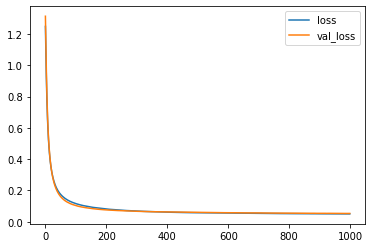

In [38]:
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label='val_loss')
plt.legend()

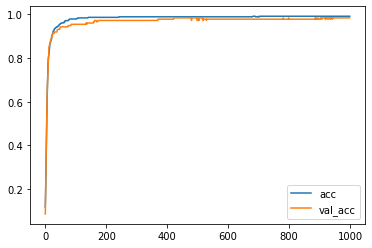

In [39]:
plt.plot(result.history['accuracy'], label='acc')
plt.plot(result.history['val_accuracy'], label='val_acc')
plt.legend()

## Make predictions

In [0]:
y_hat = model.predict(x_test)

In [0]:
y_hat = np.round(y_hat, decimals=0).flatten()

In [0]:
print('Acc: ', np.sum(y_hat == y_test)/y_test.shape[0])

## Save the model

In [0]:
model.save('linearclassification.h5')

In [0]:
!ls -lah

In [0]:
model2 = tf.keras.models.load_model('linearclassification.h5')

In [0]:
model2.evaluate(x_test, y_test)

In [0]:
from google.colab import files
files.download('linearclassification.h5')